<a href="https://colab.research.google.com/github/raeubaen/raeubaen.github.io/blob/master/phil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Le celle (i rettangoli grigi) col codice si eseguono cliccando sul pulsante "Play" in alto a sinistra in ciascuna cella. <br>
Per eseguire tutto da capo, Runtime -> Restart and run all <br>
La prima cosa da fare è accedere a Drive, eseguendo la prima cella e seguendo le sue indicazioni. <br>
Una volta incollato in codice nella casella, premi Invio.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

La cella in basso importa i pacchetti richiesti.

In [0]:
from PIL import Image as im
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

Ora si definisce l'accesso ai file di Drive.

E' consigliato inserire tutti i file necessari in una cartella "cover" su Drive. <br> 
Al suo interno devono esserci:<br>
  "mask.jpg", immagine in bianco e nero con la maschera da applicare<br>
  "trace.jpg", immagine "traccia". <br>
  una cartella "photos" con all'interno le foto coi filtri da usare <br>

Tutti i nomi di file e cartelle possono essere cambiati facilmente dal codice.


In [0]:
drive_folder = '/content/drive/My Drive'
cover_folder = os.path.join(drive_folder, 'cover')
photos_folder = os.path.join(cover_folder, 'photos')

Innanzitutto processo la maschera da applicare. <br>
Essa viene portata alla risoluzione finale in bianco e nero e mostrata in figura. <br>
`size` indica quante foto vanno inserite per riga e colonna.

I pixel in bianco nell'immagine di maschera diventano 1 nella tabella in basso e nero nella figura, e viceversa. <br>
L'immagine "traccia" è applicata sulle parti nere dell'immagine, che sono bianche in figura.

     0    1    2    3    4    5    6    7    8    9
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0
2  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0
3  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0
5  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0
6  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0
7  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0
8  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
9  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0


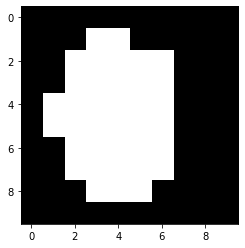

In [0]:
mask_size = 10
thresold = 200

mask_file = os.path.join(cover_folder, 'mask.jpg')
mask = (
    np.asarray(
        im.open(mask_file).convert("L").resize((mask_size, mask_size))
    ) > thresold
) * 1.0


print(pd.DataFrame(mask))

plt.imshow(mask, cmap="binary")

Ora acquisisco l'immagine che verrà usata come "traccia" e anche tutte le altre, che verranno disposte a caso. <br>
A titolo di esempio, l'immagine "traccia" è bianca e le altre colorate.

Final resolution: 3000x3000

Immagine "traccia":


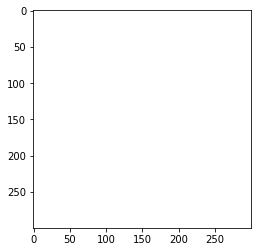

Altre immagini:


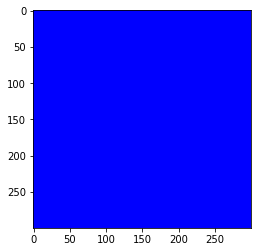

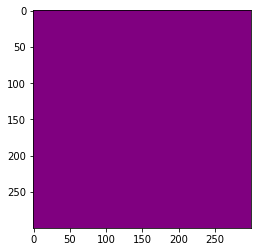

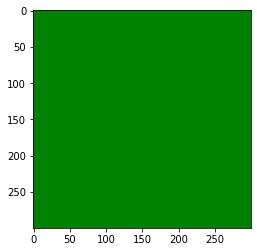

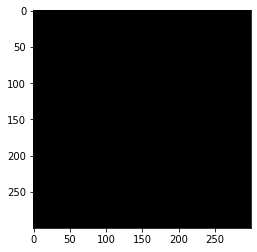

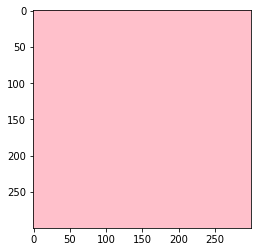

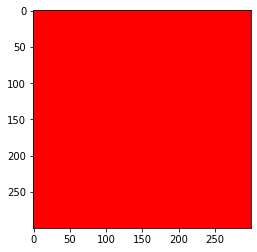

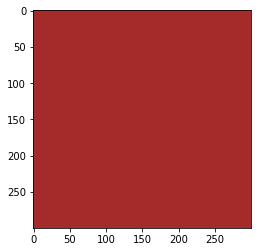

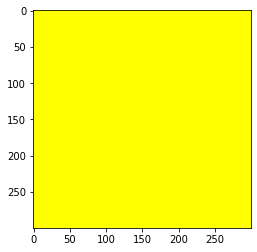

In [0]:
photo_size = 300
final_size = photo_size*mask_size
print(f"Final resolution: {final_size}x{final_size}\n")

trace_file = os.path.join(cover_folder, 'trace.png')

print('Immagine "traccia":')
trace = np.array(
        im.open(trace_file).convert("RGB").resize((photo_size, photo_size))
    )
plt.imshow(trace)
plt.show()
print("Altre immagini:")
photos = []
for file in os.listdir(photos_folder):
    photo = np.array(
        im.open(os.path.join(photos_folder, file)).convert("RGB").resize((photo_size, photo_size))
    ).astype("uint8")
    photos.append(photo)
    plt.close()
    plt.imshow(photo)
    plt.show()


Le immagini colorate vengono disposte a caso, mentre quella bianca segue la disposizione indicata dalla maschera.

Il risultato viene salvato in un file su Drive (nella cartella "cover") che inizia con output e contiene la data e l'ora della creazione. <br>
Ad esempio `output1520.png` <br>
Ci saranno molto probabilmente problemi coi fusi orari, pazienza. <br>

Rieseguendo la cella più volte si ottengono risultati diversi, che vengono salvati tutti su Drive.


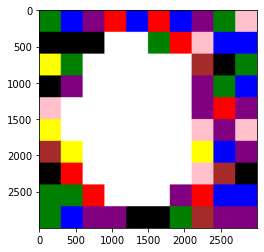

In [0]:
from pytz import timezone
from datetime import datetime

time = datetime.now(timezone('Europe/Rome')).strftime('%H:%M:%S')

new_image = np.zeros((final_size, final_size, 3)).astype("uint8")

output_file = os.path.join(cover_folder, f"output{time}.png")

p = photo_size
photos_num = len(photos)
for i in range(mask_size):
    for j in range(mask_size):
        if mask[i][j] == 0:
            new_image[p*i : p*(i+1), p*j : p*(j+1)] = trace
        else:
            new_image[p*i : p*(i+1), p*j : p*(j+1)] = photos[np.random.randint(0, photos_num)]
            
plt.imshow(new_image)
plt.savefig(output_file)
plt.show()